# Perceptron Rule for a single Neuron

Import statements needed for the problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib inline

### Reading all the 4 CSV files

In [2]:
data_1 = pd.read_csv('/home/anushya/Downloads/datafile1.csv',header = None)
data_1.columns = ['X1','X2','Y']
data_1.head()

,X1,X2,Y
0,1.190552,1.203027,1
1,-0.270070,0.623674,0
2,-1.697935,-1.600293,1
3,1.651582,0.563215,0
4,-0.848376,-0.259214,1


In [3]:
data_2 = pd.read_csv('/home/anushya/Downloads/datafile2.csv',header = None)
data_2.columns = ['X1','X2','Y']
data_2.head()

,X1,X2,Y
0,-1.274982,1.164019,1
1,-1.700746,-1.338387,0
2,-1.949133,0.099101,0
3,-1.595925,1.798609,1
4,0.768799,-0.583708,0


In [4]:
data_3 = pd.read_csv('/home/anushya/Downloads/datafile3.csv',header = None)
data_3.columns = ['X1','X2','Y']
data_3.head()

,X1,X2,Y
0,-0.335753,1.772203,0
1,0.743322,0.223808,1
2,1.074840,-1.303596,1
3,1.215476,0.737510,0
4,1.467205,-0.246689,0


In [5]:
data_4 = pd.read_csv('/home/anushya/Downloads/datafile4.csv',header = None)
data_4.columns = ['X1','X2','Y']
data_4.head()

,X1,X2,Y
0,-0.773466,1.821154,1
1,-0.469514,-0.450884,0
2,-1.047133,0.197923,1
3,1.264943,-1.941409,0
4,0.584422,-1.393612,0


### Analysing the datasets by scatterplot for checking whether they are linearly seperable or not

<IPython.core.display.Javascript object>


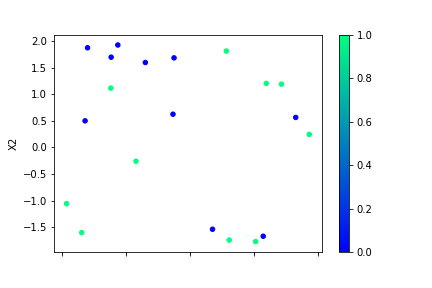

In [33]:
cm= plt.cm.get_cmap('winter')
data_1_plot = data_1.plot.scatter(x = 0,y = 1,c=data_1.Y, cmap = cm)
data_1_plot

<IPython.core.display.Javascript object>


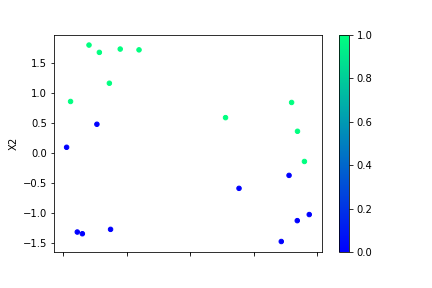

In [34]:
data_2_plot = data_2.plot.scatter(x = 0,y = 1,c= data_2.Y, cmap = cm)
data_2_plot

<IPython.core.display.Javascript object>


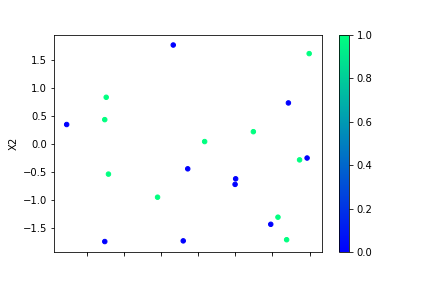

In [35]:
data_3_plot = data_3.plot.scatter(x = 0,y = 1,c= data_3.Y, cmap = cm)
data_3_plot

<IPython.core.display.Javascript object>


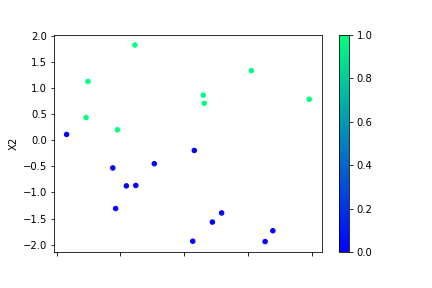

In [36]:
data_4_plot = data_4.plot.scatter(x = 0,y = 1,c= data_4.Y, cmap = cm)
data_4_plot

### Functions for predicting weights and training perceptron

In [10]:
def predict(row, weights):
    activation_func = weights[0]
    for i in range(len(row)-1):
        activation_func += weights[i + 1] * row[i]
    if(activation_func >= 0.0):
        return 1.0
    else:
        return 0.0
    

In [63]:
def weight_train(train, l_rate, n_epoch):
    weights = [0.0 for i in range(3)]
    w = np.array([])
    size = 0
    for epoch in range(n_epoch):
        size = size + 1
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + learn_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + learn_rate * error * row[i]
        w = np.append(w,weights)
        print('>epoch=%d, lrate=%.2f, error=%.2f ' % (epoch, learn_rate, sum_error))
        if sum_error == 0:
            break
    w = w.reshape(size,3)
    return weights,w

### Implementing Perceptron rule in Dataset 4(because it seems linearly seperable in scatterplot )

In [12]:
data4 = data_4.values.tolist()
data4

[[-0.7734663420597916, 1.8211543955378424, 1.0],
 [-0.4695138066103177, -0.4508841969045716, 0.0],
 [-1.0471326176906754, 0.197922763281726, 1.0],
 [1.264943390066445, -1.9414087520017749, 0.0],
 [0.5844217945065986, -1.3936122060516904, 0.0],
 [1.0487106423622636, 1.3287916109954483, 1.0],
 [-0.9069660237119934, -0.8754192287916744, 0.0],
 [1.95576227266912, 0.7823248114925394, 1.0],
 [0.295402817062167, 0.8608759554778294, 1.0],
 [0.4395948216041572, -1.5678836419701176, 0.0],
 [-1.5378551929146045, 0.4317640001171612, 1.0],
 [0.13218610618728466, -1.934249372006115, 0.0],
 [-1.1196108884792042, -0.532030956760988, 0.0],
 [0.3118255213339496, 0.7038684703553244, 1.0],
 [1.3863803272924111, -1.7343681876578203, 0.0],
 [-1.8425539998914284, 0.10927464489655314, 0.0],
 [-1.5088132781644226, 1.1230918441016224, 1.0],
 [-1.0744893848149966, -1.3091046228986176, 0.0],
 [-0.7589441067097384, -0.8676328127088775, 0.0],
 [0.15586900358698008, -0.19697478503346, 0.0]]

In [28]:
#converting dataset to array
array_2 = np.array(data_2)
array_4 = np.array(data_4)

In [65]:
learn_rate = 0.1
n_epoch = 5
weights, w1 = weight_train(array_4, learn_rate, n_epoch)
print(weights)
print(w1)

>epoch=0, lrate=0.10, error=6.00 
>epoch=1, lrate=0.10, error=2.00 
>epoch=2, lrate=0.10, error=4.00 
>epoch=3, lrate=0.10, error=0.00 
[0.0, 0.073019063621648589, 0.4089264379495875]
[[ 0.          0.08040302  0.25919015]
 [ 0.          0.15994515  0.26805496]
 [ 0.          0.07301906  0.40892644]
 [ 0.          0.07301906  0.40892644]]


In [14]:
a =[]
for row in data4:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0


### Implementing Perceptron rule in Dataset 2(because it seems linearly seperable in scatterplot )

In [15]:
data2 = data_2.values.tolist()
data2

[[-1.27498178785233, 1.1640191057481308, 1.0],
 [-1.7007457035682425, -1.3383866942826796, 0.0],
 [-1.949133273030132, 0.09910075606479696, 0.0],
 [-1.5959247762304123, 1.7986090814735674, 1.0],
 [0.7687991642884557, -0.5837082048925328, 0.0],
 [1.6868910012395828, -1.1206132925237626, 0.0],
 [-1.2562149390173247, -1.2655645540563831, 0.0],
 [1.7997126425036618, -0.13688127427267816, 1.0],
 [1.5573407847058982, -0.36824621532345336, 0.0],
 [-1.4328815871617868, 1.6770203000339223, 1.0],
 [-1.8867253263763168, 0.8607260144008801, 1.0],
 [0.5561881952773233, 0.5920027594030959, 1.0],
 [1.4348294454806203, -1.4673919179446, 0.0],
 [1.5976504027596063, 0.8442340188890713, 1.0],
 [-1.10391902893104, 1.7321207594732972, 1.0],
 [1.6904291175552988, 0.36505880810506586, 1.0],
 [1.8756577687204892, -1.019308219037295, 0.0],
 [-0.8075232641974113, 1.7187935790471849, 1.0],
 [-1.780747876684558, -1.3099144756465453, 0.0],
 [-1.4714839482852518, 0.4819613276429106, 0.0]]

In [66]:
learn_rate = 0.1
n_epoch = 20
weights, w2 = weight_train(array_2, learn_rate, n_epoch)
print(weights)
print(w2)

>epoch=0, lrate=0.10, error=5.00 
>epoch=1, lrate=0.10, error=2.00 
>epoch=2, lrate=0.10, error=1.00 
>epoch=3, lrate=0.10, error=2.00 
>epoch=4, lrate=0.10, error=2.00 
>epoch=5, lrate=0.10, error=5.00 
>epoch=6, lrate=0.10, error=1.00 
>epoch=7, lrate=0.10, error=2.00 
>epoch=8, lrate=0.10, error=2.00 
>epoch=9, lrate=0.10, error=2.00 
>epoch=10, lrate=0.10, error=2.00 
>epoch=11, lrate=0.10, error=0.00 
[-0.20000000000000001, 0.18088742409070274, 0.67195749254580006]
[[-0.1         0.18186767  0.28863994]
 [-0.1         0.19517651  0.36197044]
 [-0.2         0.03944243  0.39879506]
 [-0.2         0.06367961  0.42193156]
 [-0.2         0.0879168   0.44506805]
 [-0.1         0.23967276  0.54258689]
 [-0.2         0.08393868  0.57941152]
 [-0.2         0.10817587  0.60254801]
 [-0.2         0.13241305  0.6256845 ]
 [-0.2         0.15665024  0.648821  ]
 [-0.2         0.18088742  0.67195749]
 [-0.2         0.18088742  0.67195749]]


### Dataset 1 and 3 are not linearly seperable

### Animation Graph

<IPython.core.display.Javascript object>


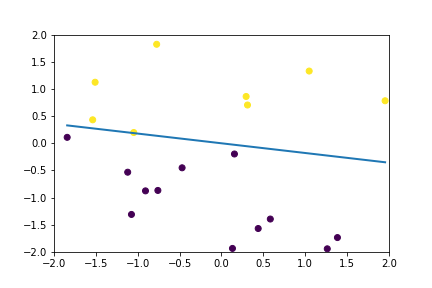

In [58]:
%matplotlib nbagg
 

fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
#array_4 = np.array(data_4)
x1 = array_4[:,0]
x2 = array_4[:,1]
y = array_4[:,2]
w = w1

ax.scatter(x1, x2, c=y)
def init():
    line.set_data([], [])
    return line,


def animate(i):
    x = [min(x1),max(x1)]
    y1 = - ( (w1[i,0] + w1[i,1] * min(x1)) / w1[i,2])
    y2 = - ( (w1[i,0] + w1[i,1] * max(x1)) / w1[i,2])
    y = [y1, y2]
    line.set_data(x, y)
    return line,

animation_graph = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(w1), interval=700, blit=True, repeat=False)


plt.show()